In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Amazon.csv')

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


In [13]:
df.set_index('Date',inplace = True)

In [14]:
df.index = pd.to_datetime(df.index,format='%Y-%m-%d')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250


Text(0.5, 1.0, 'Amazon Stock at all time')

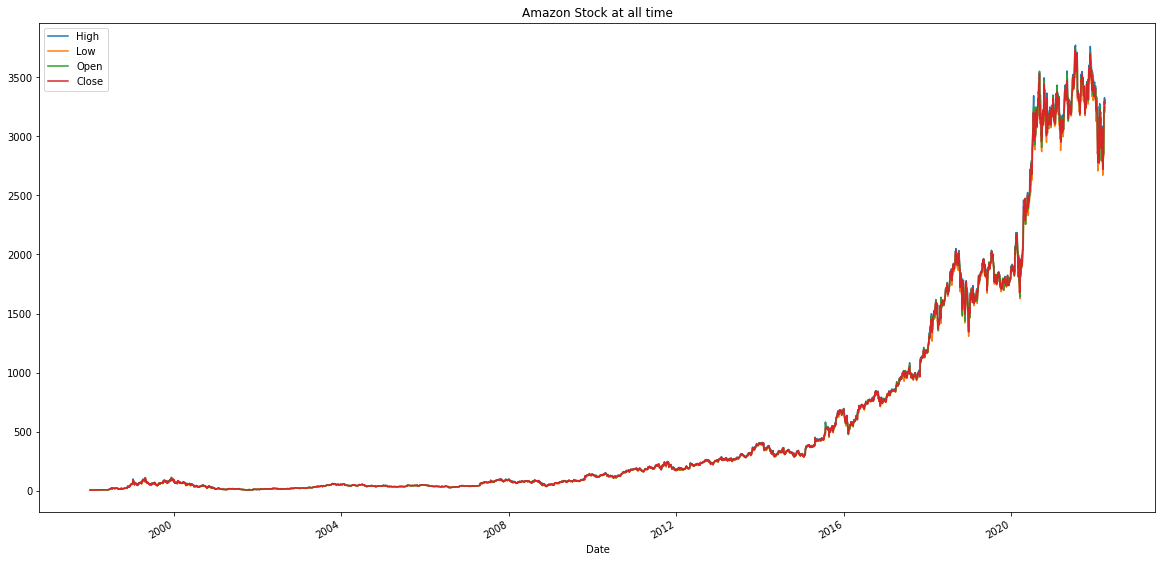

In [15]:
df[['High','Low','Open','Close']].plot(figsize=(20,10))
plt.title('Amazon Stock at all time')

Text(0, 0.5, 'Stock action')

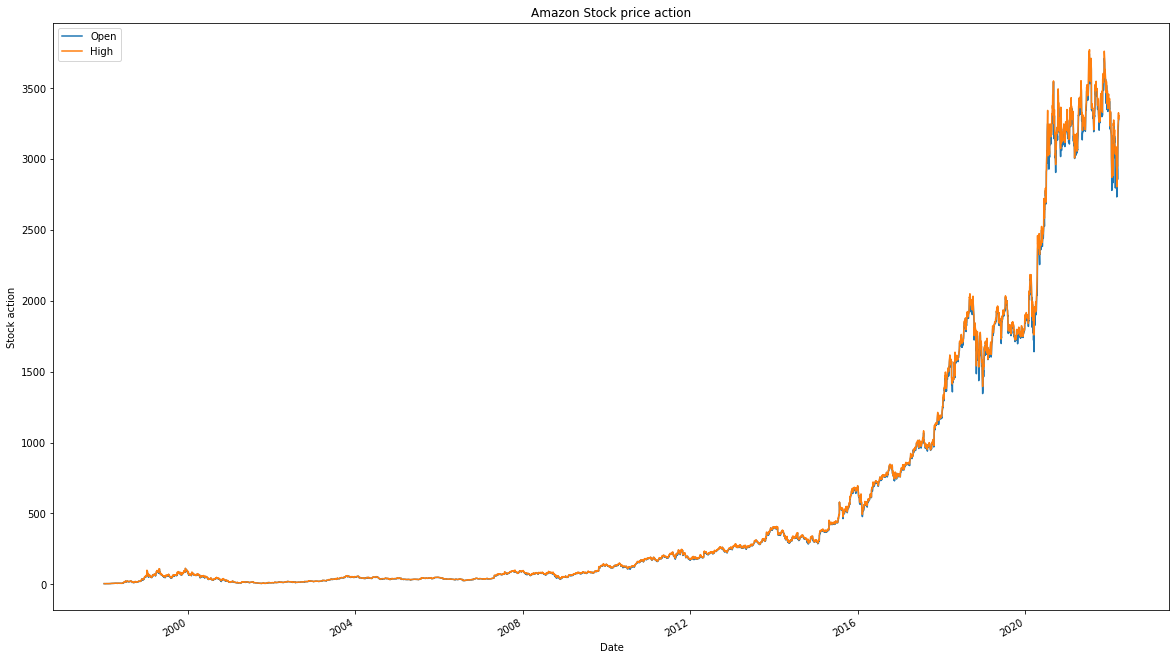

In [16]:
df[['Open','High']].plot(figsize=(20,12))
plt.title('Amazon Stock price action')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

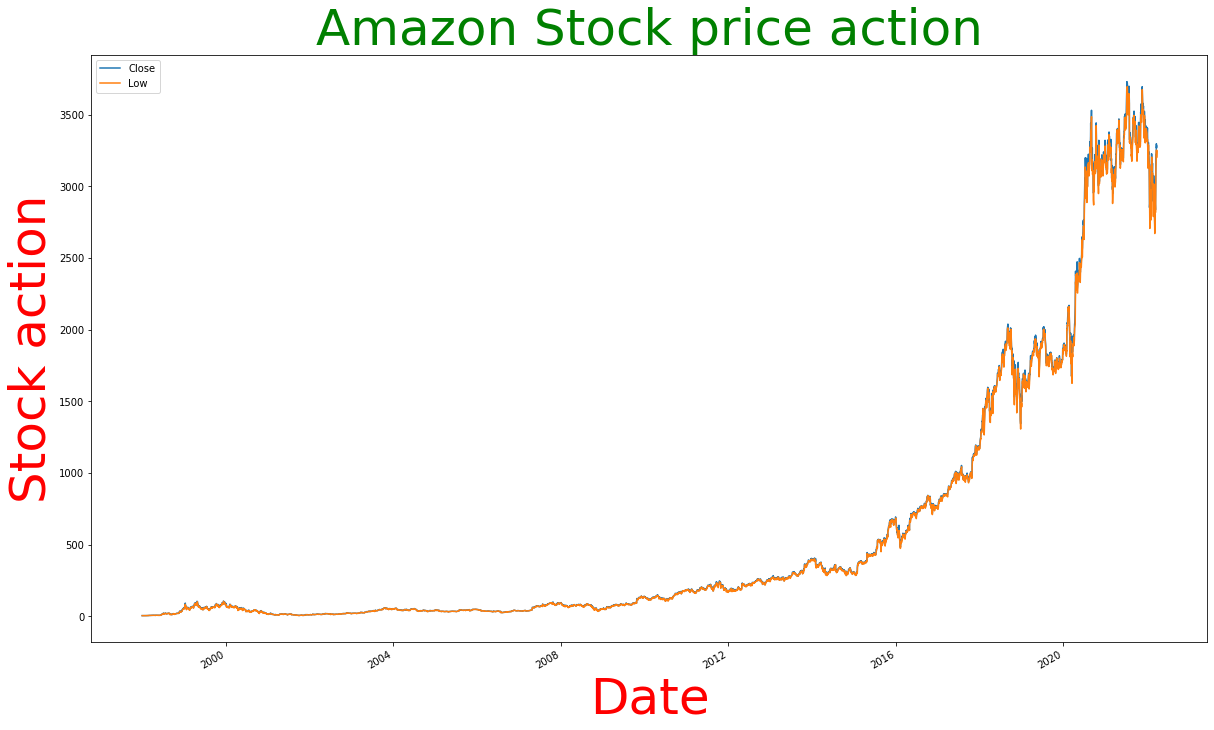

In [17]:
df[['Close','Low']].plot(figsize=(20,12))
plt.title('Amazon Stock price action',fontsize = 50, color = 'green')
plt.xlabel('Date', fontsize = 50 , color = 'red')
plt.ylabel('Stock action', fontsize = 50 , color = 'red')

Text(0, 0.5, 'Stock action')

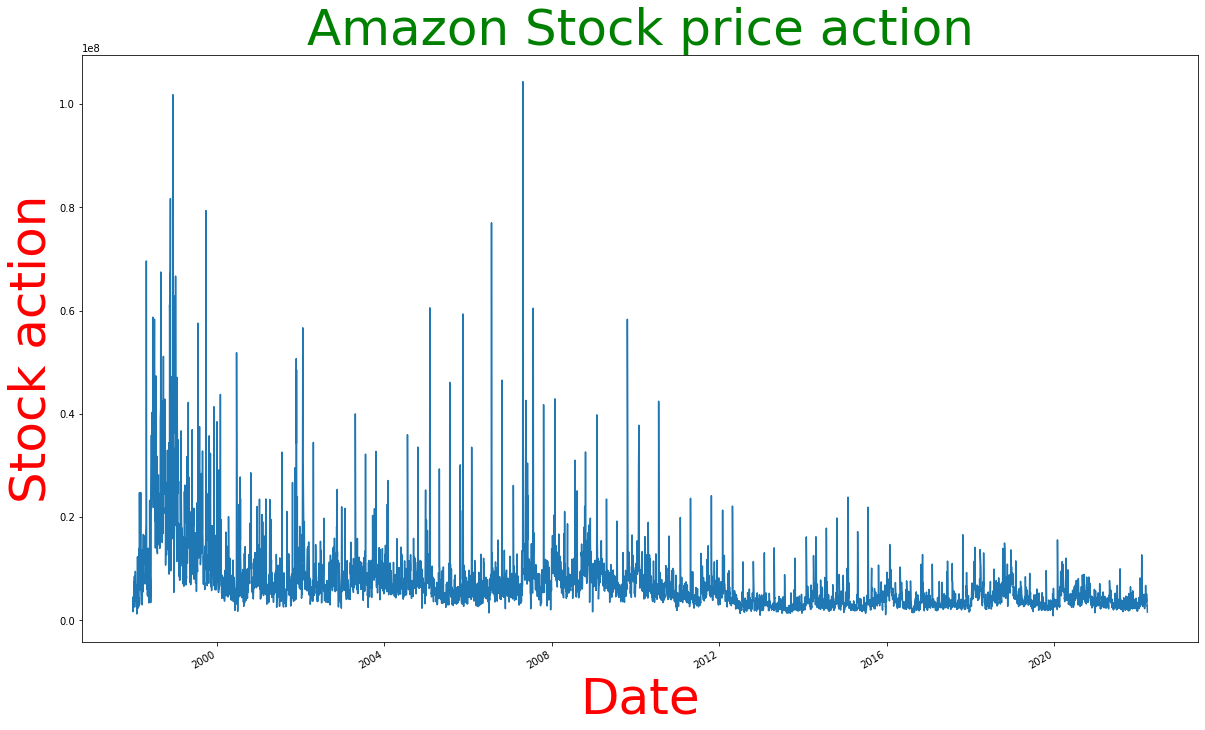

In [18]:
df['Volume'].plot(figsize=(20,12))
plt.title('Amazon Stock price action',fontsize = 50, color = 'green')
plt.xlabel('Date',fontsize = 50 , color = 'red')
plt.ylabel('Stock action',fontsize = 50 , color = 'red')

Text(0, 0.5, 'Stock action')

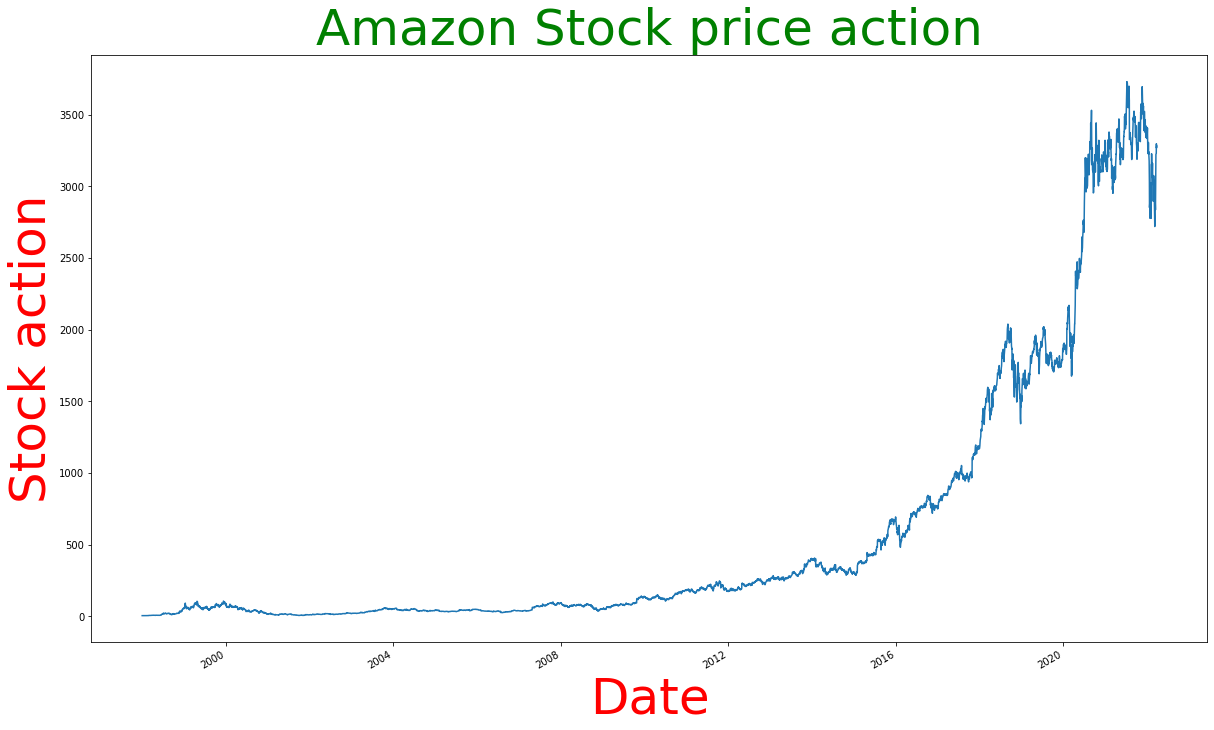

In [19]:
df['Adj Close'].plot(figsize=(20,12))
plt.title('Amazon Stock price action',fontsize = 50, color = 'green')
plt.xlabel('Date',fontsize = 50 , color = 'red')
plt.ylabel('Stock action',fontsize = 50 , color = 'red')

In [20]:
ama = df['2010':'2022']

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

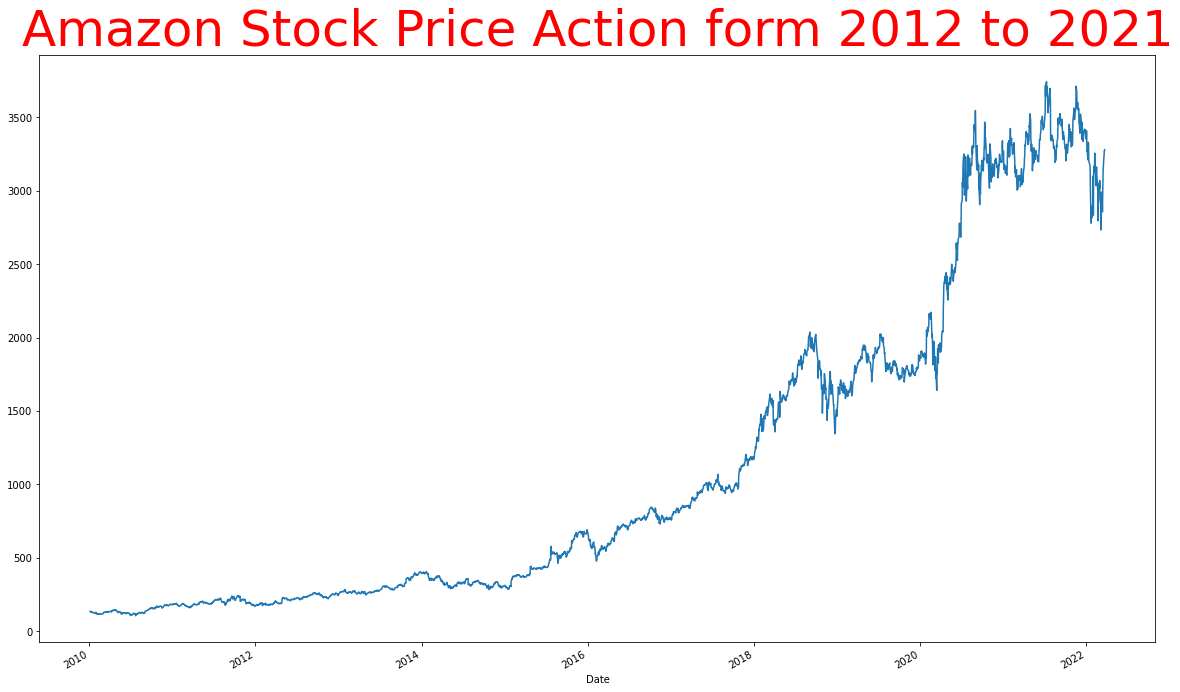

In [21]:
ama['Open'].plot(figsize=(20,12),alpha =1)
plt.title('Amazon Stock Price Action form 2012 to 2021', fontsize= 50, color='red')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2012 to 2021')

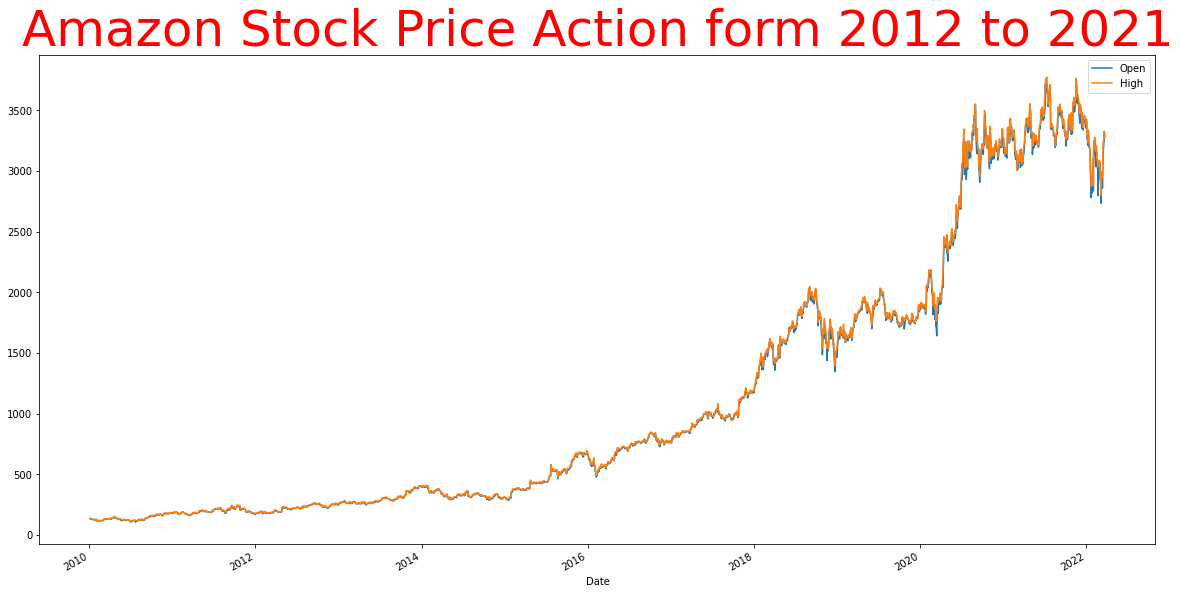

In [22]:
ama[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2012 to 2021',fontsize= 50, color='red')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

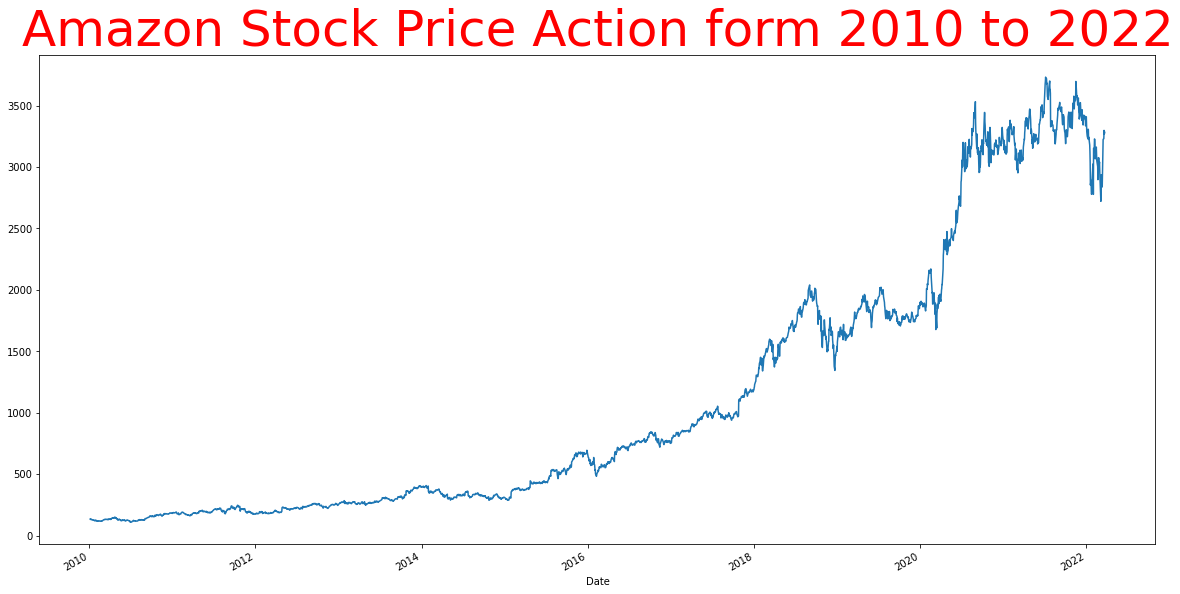

In [23]:
ama['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022',fontsize= 50, color='red')

Text(0.5, 1.0, 'Amazon Stock Price Action form 2010 to 2022')

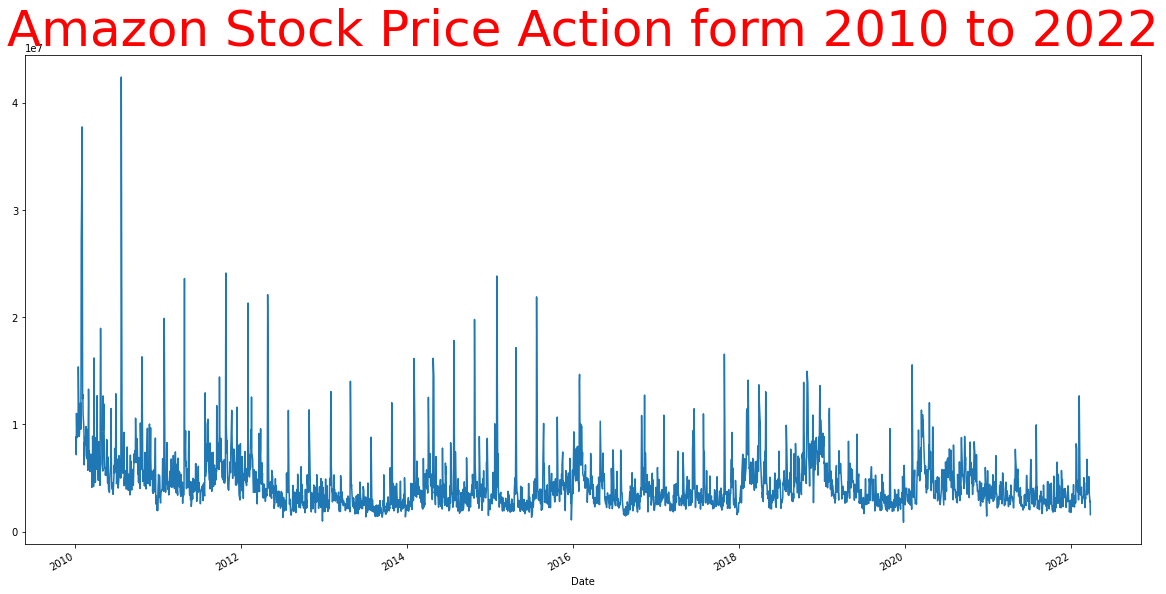

In [24]:
ama['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Amazon Stock Price Action form 2010 to 2022',fontsize= 50, color='red')

In [25]:
ama.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3079.000000,3079.000000,3079.000000,3079.000000,3.079000e+03,3079.000000
mean,1116.621395,1091.651838,1104.820826,1104.411010,4.457763e+06,1104.411010
std,1080.535486,1055.277226,1068.628180,1067.761552,2.700779e+06,1067.761552
min,111.290001,105.800003,105.930000,108.610001,8.813000e+05,108.610001
25%,261.914993,256.779999,259.095001,259.145004,2.814300e+06,259.145004
50%,628.630005,616.250000,624.469971,625.900024,3.760800e+06,625.900024
75%,1792.779968,1757.025024,1775.599976,1776.475037,5.250400e+06,1776.475037
max,3773.080078,3696.790039,3744.000000,3731.409912,4.242110e+07,3731.409912


In [26]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('result of Dckey-Fuller Test:')
    dftest =adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [27]:
print(adf_test(df['High']))

result of Dckey-Fuller Test:
Test Statistic                    2.248104
p-value                           0.998920
#Lags Used                       31.000000
Number of Observations Used    6067.000000
Critical Value (1%)              -3.431428
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [28]:
print(adf_test(df['Open']))

result of Dckey-Fuller Test:
Test Statistic                    2.265933
p-value                           0.998933
#Lags Used                       34.000000
Number of Observations Used    6064.000000
Critical Value (1%)              -3.431429
Critical Value (5%)              -2.862017
Critical Value (10%)             -2.567024
dtype: float64
None


In [29]:
print(adf_test(df['High'].resample('MS').mean()))

result of Dckey-Fuller Test:
Test Statistic                   1.558802
p-value                          0.997729
#Lags Used                      16.000000
Number of Observations Used    275.000000
Critical Value (1%)             -3.454355
Critical Value (5%)             -2.872108
Critical Value (10%)            -2.572401
dtype: float64
None


result of Dckey-Fuller Test:
Test Statistic                  -5.390742
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64
None


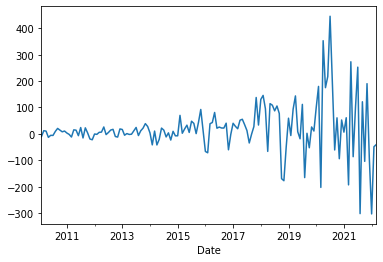

In [30]:
ama_diff = ama['Open'].resample('MS').mean() - ama['Open'].resample('MS').mean().shift(1)
ama_open_diff = ama_diff.dropna()
ama_open_diff.plot()


print(adf_test(ama_open_diff))

In [31]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [32]:
kpss_test(ama['High'])

Results of KPSS Test:
Test Statistic            8.038127
p-value                   0.010000
Lags Used                32.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\admin\Documents\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


C:\Users\admin\AppData\Local\Temp\ipykernel_8788\568378396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ama["High_diff"] = ama["High"] - ama["High"].shift(1)


<AxesSubplot:xlabel='Date'>

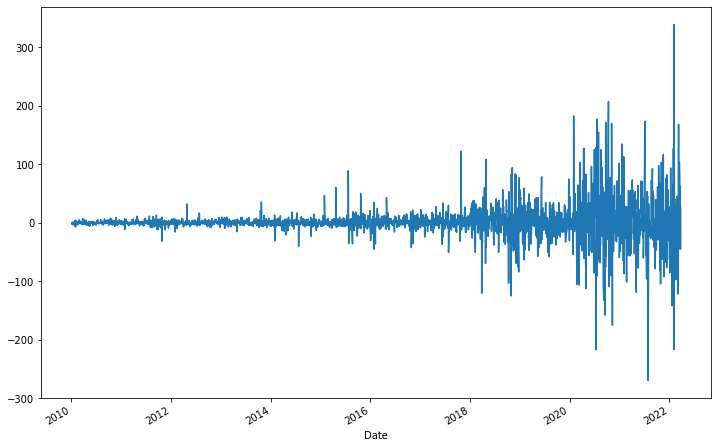

In [33]:
ama["High_diff"] = ama["High"] - ama["High"].shift(1)
ama["High_diff"].dropna().plot(figsize=(12, 8))

In [34]:
kpss_test(ama['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.25626
p-value                  0.10000
Lags Used                0.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


c:\Users\admin\Documents\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [35]:
kpss_test(ama['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.285843
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\Users\admin\Documents\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [36]:
kpss_test(ama['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           1.391378
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


c:\Users\admin\Documents\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [37]:
adf_test(ama['High_diff'].dropna())

result of Dckey-Fuller Test:
Test Statistic                -1.264224e+01
p-value                        1.426592e-23
#Lags Used                     2.600000e+01
Number of Observations Used    3.051000e+03
Critical Value (1%)           -3.432495e+00
Critical Value (5%)           -2.862488e+00
Critical Value (10%)          -2.567275e+00
dtype: float64


In [38]:
train_ama = ama['High'].iloc[:-4]
print(train_ama)
X_train=[]
y_train=[]

for i in range(2, len(train_ama)):
    X_train.append(train_ama[i-2:i])
    y_train.append(train_ama[i])

Date
2010-01-04     136.610001
2010-01-05     135.479996
2010-01-06     134.729996
2010-01-07     132.320007
2010-01-08     133.679993
                 ...     
2022-03-15    2959.699951
2022-03-16    3063.000000
2022-03-17    3149.969971
2022-03-18    3231.879883
2022-03-21    3261.679932
Name: High, Length: 3075, dtype: float64


In [39]:
import math
train_len = math.ceil(len(train_ama)*0.8)
train_len

2460

In [40]:
# For Model and apply RNN + LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed 

In [42]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 - 2s - loss: 1905267.2500 - 2s/epoch - 78ms/step
Epoch 2/10
31/31 - 0s - loss: 234232.9531 - 243ms/epoch - 8ms/step
Epoch 3/10
31/31 - 0s - loss: 9843.4932 - 192ms/epoch - 6ms/step
Epoch 4/10
31/31 - 0s - loss: 1260.0363 - 166ms/epoch - 5ms/step
Epoch 5/10
31/31 - 0s - loss: 930.4856 - 145ms/epoch 

<AxesSubplot:>

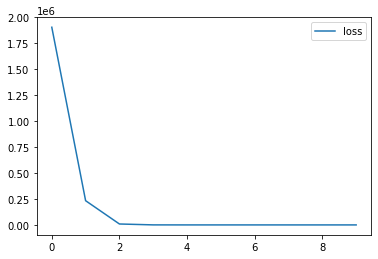

In [44]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [45]:
test_data = train_ama[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [47]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)
print(prediction)

20/20 [==============================] - 0s 2ms/step
[[1733.6072]
 [1741.2665]
 [1742.3153]
 [1760.4629]
 [1780.8832]
 [1792.2682]
 [1794.9125]
 [1788.2089]
 [1786.9495]
 [1777.3916]
 [1779.3293]
 [1773.448 ]
 [1771.332 ]
 [1776.5889]
 [1778.9218]
 [1786.71  ]
 [1793.9456]
 [1806.313 ]
 [1811.1395]
 [1804.6606]
 [1803.2671]
 [1795.6068]
 [1783.0996]
 [1782.3966]
 [1778.6804]
 [1769.0725]
 [1762.6642]
 [1756.0115]
 [1756.5574]
 [1760.6036]
 [1752.4838]
 [1745.5103]
 [1762.9655]
 [1787.443 ]
 [1811.5073]
 [1823.4161]
 [1812.6005]
 [1785.7717]
 [1780.9677]
 [1773.3658]
 [1757.1917]
 [1760.3938]
 [1756.5245]
 [1749.1752]
 [1756.8583]
 [1765.7135]
 [1768.1475]
 [1781.177 ]
 [1794.3724]
 [1794.0696]
 [1797.5133]
 [1796.1244]
 [1793.3048]
 [1837.0472]
 [1886.8351]
 [1890.2201]
 [1865.2433]
 [1877.5157]
 [1890.0162]
 [1894.9005]
 [1908.2216]
 [1910.9581]
 [1913.5995]
 [1910.335 ]
 [1900.5708]
 [1890.5302]
 [1881.1547]
 [1881.4421]
 [1884.9312]
 [1889.7266]
 [1897.6902]
 [1894.0974]
 [1891.5713

In [48]:
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

20/20 [==============================] - 0s 3ms/step
Train rmse: 30.519196231360205
Validation rmse: 60.74710977874461


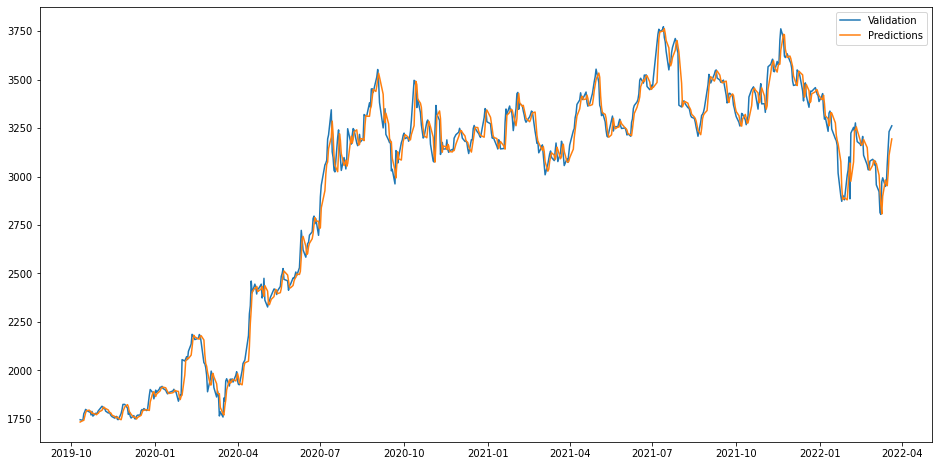

In [49]:
valid = pd.DataFrame(train_ama[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()


In [50]:
# data frame to see the percentage of error between real and predicted

variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,615.000000
mean,5.873148
std,60.511746
min,-275.529297
25%,-27.583862
50%,3.937012
75%,36.981873
max,248.312012


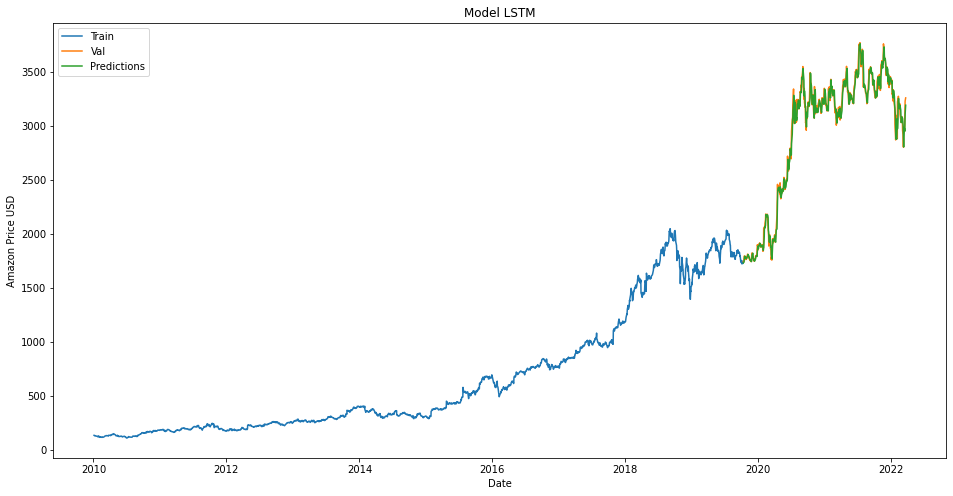

In [52]:
train = train_ama[:train_len]
valid = pd.DataFrame(train_ama[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Amazon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()